
# Deep Learning: Assignment 4

    Visualize contour plotting for Simple FeedForwardNetwork
    Write Multi-class Network as shown in Fig.(SecondNetwork)
    Write generic code for Multi-class Network in Fig. (FFNetworkMultiClass)




Import necessary libraries

In [15]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import accuracy_score, mean_squared_error


# Contour Plots

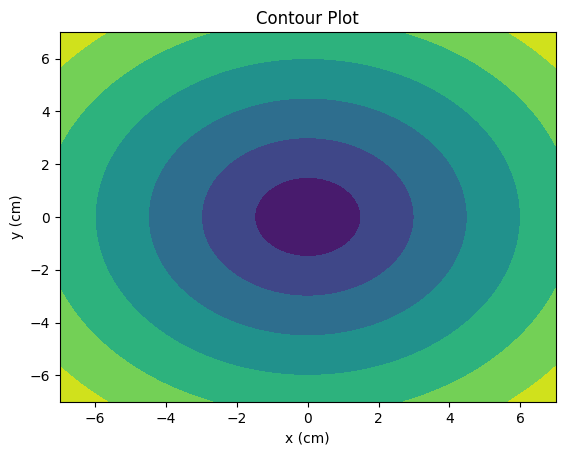

In [16]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-7.0, 7.0, 100)
y = np.linspace(-7.0, 7.0, 100)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)

ax.set_title('Contour Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

# Generate Data

In [17]:
data, labels = make_blobs(n_samples=500, centers=4, n_features=2, random_state=10)
print(data.shape, labels.shape)

(500, 2) (500,)


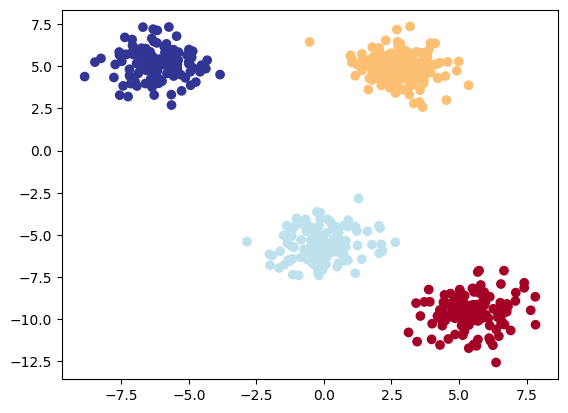

In [18]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap='RdYlBu')
plt.show()

In [19]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

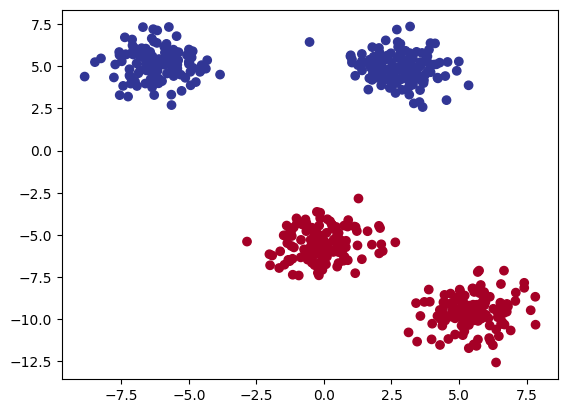

In [20]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap="RdYlBu")
plt.show()

# Split Dataset

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=100)

print(X_train.shape, X_val.shape)


(375, 2) (125, 2)


## Feedforward Multiclass Neural Network

**Feedforward Multiclass Neural Network Class**


In [35]:
class FirstFFNetwork:
    def __init__(self):
        #initialize weight to random values and bias to zero
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.w7 = np.random.randn()
        self.w8 = np.random.randn()
        self.w9 = np.random.randn()
        self.w10 = np.random.randn()
        self.w11 = np.random.randn()
        self.w12 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        self.b4 = 0
        self.b5 = 0
        self.b6 = 0

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    def forward_pass(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
        self.h4 = self.sigmoid(self.a4)
        self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
        self.h5 = self.sigmoid(self.a5)
        self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b6
        self.h6 = self.sigmoid(self.a6)
        res_lst = [self.h3, self.h4, self.h5, self.h6]
        #return next(x[0] for x in enumerate([self.h3, self.h4, self.h5, self.h6]) if x[1] > 0.3)
        return res_lst.index(max(res_lst))

    def grad(self, x, y):
        self.forward_pass(x)
        out=[0,0,0,0]
        out[y]=1
        self.dw5 = (self.h3-out[0]) * self.h3*(1-self.h3) * self.h1
        self.dw6 = (self.h3-out[0]) * self.h3*(1-self.h3) * self.h2
        self.dw7 = (self.h4-out[1]) * self.h4*(1-self.h4) * self.h1
        self.dw8 = (self.h4-out[1]) * self.h4*(1-self.h4) * self.h2
        self.dw9 = (self.h5-out[2]) * self.h5*(1-self.h5) * self.h1
        self.dw10 = (self.h5-out[2]) * self.h5*(1-self.h5) * self.h2
        self.dw11 = (self.h6-out[3]) * self.h6*(1-self.h6) * self.h1
        self.dw12 = (self.h6-out[3]) * self.h6*(1-self.h6) * self.h2
        self.db3 = (self.h3-out[0]) * self.h3*(1-self.h3)
        self.db4 = (self.h4-out[1]) * self.h4*(1-self.h4)
        self.db5 = (self.h5-out[2]) * self.h5*(1-self.h5)
        self.db6 = (self.h6-out[3]) * self.h6*(1-self.h6)

        self.dw1 = (self.h3-out[0]) * self.h3*(1-self.h3) * self.w5 * (self.h4-out[1]) * self.h4*(1-self.h4) * self.w7 * (self.h5-out[2]) * self.h5*(1-self.h5) * self.w9 * (self.h6-out[3]) * self.h6*(1-self.h6) * self.w11 * self.h1*(1-self.h1) * self.x1
        self.dw2 = (self.h3-out[0]) * self.h3*(1-self.h3) * self.w5 * (self.h4-out[1]) * self.h4*(1-self.h4) * self.w7 * (self.h5-out[2]) * self.h5*(1-self.h5) * self.w9 * (self.h6-out[3]) * self.h6*(1-self.h6) * self.w11 * self.h1*(1-self.h1) * self.x2
        self.db1 = (self.h3-out[0]) * self.h3*(1-self.h3) * self.w5 * (self.h4-out[1]) * self.h4*(1-self.h4) * self.w7 * (self.h5-out[2]) * self.h5*(1-self.h5) * self.w9 * (self.h6-out[3]) * self.h6*(1-self.h6) * self.w11 * self.h1*(1-self.h1)
        self.dw3 = (self.h3-out[0]) * self.h3*(1-self.h3) * self.w6 * (self.h4-out[1]) * self.h4*(1-self.h4) * self.w8 * (self.h5-out[2]) * self.h5*(1-self.h5) * self.w10 * (self.h6-out[3]) * self.h6*(1-self.h6) * self.w12 * self.h2*(1-self.h2) * self.x1
        self.dw4 = (self.h3-out[0]) * self.h3*(1-self.h3) * self.w6 * (self.h4-out[1]) * self.h4*(1-self.h4) * self.w8 * (self.h5-out[2]) * self.h5*(1-self.h5) * self.w10 * (self.h6-out[3]) * self.h6*(1-self.h6) * self.w12 * self.h2*(1-self.h2) * self.x2
        self.db2 = (self.h3-out[0]) * self.h3*(1-self.h3) * self.w6 * (self.h4-out[1]) * self.h4*(1-self.h4) * self.w8 * (self.h5-out[2]) * self.h5*(1-self.h5) * self.w10 * (self.h6-out[3]) * self.h6*(1-self.h6) * self.w12 * self.h2*(1-self.h2)

    def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
        if display_loss:
            loss = {}
        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6 = [0]*18
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                dw7 += self.dw7
                dw8 += self.dw8
                dw9 += self.dw9
                dw10 += self.dw10
                dw11 += self.dw11
                dw12 += self.dw12
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
                db4 += self.db4
                db5 += self.db5
                db6 += self.db6
            m = X.shape[1]
            self.w1 -= learning_rate * dw1 / m
            self.w2 -= learning_rate * dw2 / m
            self.w3 -= learning_rate * dw3 / m
            self.w4 -= learning_rate * dw4 / m
            self.w5 -= learning_rate * dw5 / m
            self.w6 -= learning_rate * dw6 / m
            self.w7 -= learning_rate * dw7 / m
            self.w8 -= learning_rate * dw8 / m
            self.w9 -= learning_rate * dw9 / m
            self.w10 -= learning_rate * dw10 / m
            self.w11 -= learning_rate * dw11 / m
            self.w12 -= learning_rate * dw12 / m
            self.b1 -= learning_rate * db1 / m
            self.b2 -= learning_rate * db2 / m
            self.b3 -= learning_rate * db3 / m
            self.b4 -= learning_rate * db4 / m
            self.b5 -= learning_rate * db5 / m
            self.b6 -= learning_rate * db6 / m
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

100%|██████████| 1500/1500 [00:46<00:00, 32.38epoch/s]


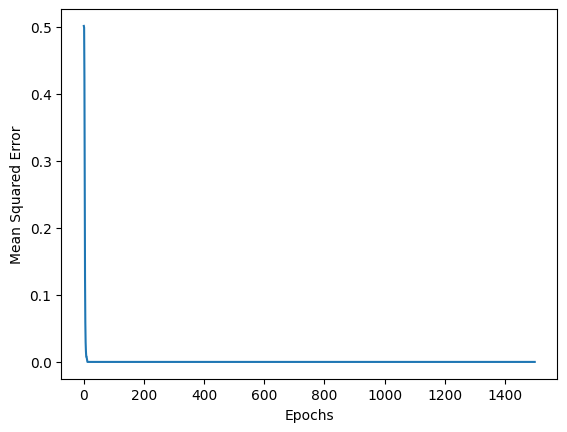

In [38]:
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=1500, learning_rate=.01, display_loss=True)

**Fit Model and View Results**

In [36]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = ffn.predict(X_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.97
Validation accuracy 0.98


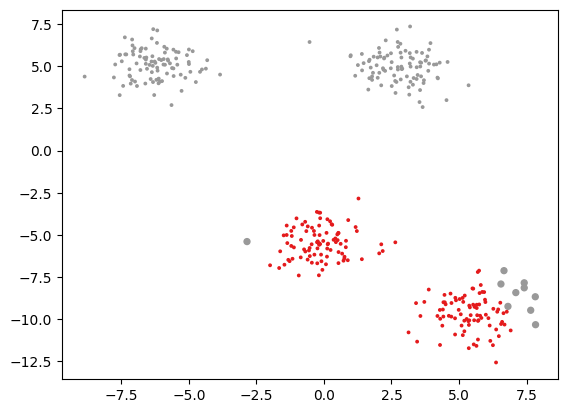

In [37]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Set1',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()